
Assignment Solution- Statistics 2
## Part 1: Frequentist Inference - Estimating the population proportion
1- Let's first check the interpretation of the confidence interval using simulation.

a. Generate 200 random coin flips from a fair coin: p(head)=0.5. You can use scipy.stats.bernoulli by generating 0 or 1 values with equal probability:

In [14]:
from scipy import stats
import numpy as np

In [41]:
import matplotlib.pyplot as plt

In [43]:
from coin import Coin

In [15]:
from scipy.stats import norm

In [18]:
 dist = stats.bernoulli(0.5)
 flips = dist.rvs(200)

Assume that 1 represents 'head' and '0' represents 'tail'. Using the generated sample, estimate the head probability and compute its corresponding 95% confidence interval.

b. Repeat the same experiment of the previous question for 1000 times. In each time, generate 200 random coin flips from a fair coin, find the 95% confidence interval and check if the true head probability (0.5) is in the confidence interval. How many times did you find that the true head probability is in the computed confidence interval.

In [38]:
num = 200 # number of samples
dist = stats.bernoulli(0.5)
flips = dist.rvs(num)

# estimate of the head probability
n_head = sum(flips)/len(flips) 
# standard error
sigma = np.sqrt(n_head*(1-n_head)/num)
# critical value corresponding to 95% confidence interval
z_score = norm.ppf((1-0.95)/2)

# 95% confidence interval
interval = (n_head + z_score*sigma, n_head-z_score*sigma)

print("Estimate head probability: ",  n_head)
print("95% Confidence interval:", interval)

Estimate head probability:  0.45
95% Confidence interval: (0.38105215528670255, 0.5189478447132975)


In [26]:
exp = 1000
counter = 0 

for i in range(0, exp):
    
    flips = dist.rvs(num)
    
   
    n_head = sum(flips)/len(flips) 
    # error
    sigma = np.sqrt(n_head*(1-n_head)/num)
    # critical value corresponding to 95% confidence interval
    z_score = norm.ppf((1-0.95)/2)

    # 95% confidence interval
    interval = (n_head + z_score*sigma, n_head-z_score*sigma)
    
    if ((interval[0]<=0.5) and (interval[1]>=0.5)):
        counter +=1


print("Percentage of times the true head probability falled in the confidence interval: ",format(100*counter/exp))

Percentage of times the true head probability falled in the confidence interval:  94.4


1- You are now given a biased coin that you can find in src/coin.py. The probability of head, unknown to you, is what you want to estimate. You can use the coin like this:

The flip method will return either H or T.

a. Flip the coin for 500 times. Estimate the head probability and compute its corresponding 95% confidence interval.

Save the obtained results of the coin flips (observations) because we will use them in the following question and in the second part.

b. Now let's understand in which sense the point estimate: sample proportion is a good estimate. It can be shown that the sample proportion is the maximum likelihood estimate (MLE), i.e. it is the value under which the observed data is most likely to occur. Let's verify it using simulation and by plotting the likelihood function of all observations:

- Fill in the coin_likelihood function in src/functions.py. It should take one observation (either 'H' or 'T') and the value for head probability p and return a value between 0 and 1. For example, if the data is 'H' and the value of p is 0.3, it should return 0.3. If the data is 'T' and the value of p is 0.3, it should return 0.7.

The coin_likelihood function should be used like this:

coin_likelihood(single_data_point, p)
Here, single_data_point means the result of one coin flip, and p means the value of possible head probability.

- The likelihood function of the observations is viewed as a function defined over all possible values of p. Now p is a continuous non-negative value less than 1. To simulate and plot the likelihood function, we will consider a discrete set of values for p Define a list or array that contains the possible values of p as follows: 0, 0.01, 0.02, ..., 0.99,1. You can use np.linspace.

- For each possible value of p (defined in b.2), compute the likelihood of all observations obtained in (2.a) (hint: product of likelihood of each individual observation). Save the results in an array or list of likelihood values.

- Plot the likelihood function of all observations vs the possible values for head probability. Which value of p maximizes the likelihood function. Is it close to the point estimate you found in (2.a).

In [55]:
from coin import Coin

num_obs = 500
observations = []

for i in range(0,num_obs):
    mycoin = Coin()
    observations.append(mycoin.flip())

# estimate probability of head
n_head = sum(1 for observation in observations if observation=='H')/num_obs
print("Estimate of the head probability:", n_head)

# standard error
sigma = np.sqrt(n_head*(1-n_head)/num_obs)
# critical value corresponding to 95% confidence interval
z_score = norm.ppf((1-0.95)/2)

# 95% confidence interval
interval = (n_head + z_score*sigma, n_head-z_score*sigma)
print("95% Confidence interval:", interval)

Estimate of the head probability: 0.564
95% Confidence interval: (0.5205343793362163, 0.6074656206637836)


In [56]:
def coin_probability(single_data_point, p):

    if(single_data_point == 'H'):
        return p
    return 1-p

The value of p maximizes the likelihood function is:  0.56


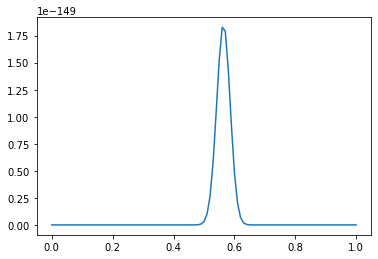

In [59]:
p = np.linspace(0, 1, 101)
likelihoods = []

for prob in p:
    likelihood = 1
    for observation in observations:
        likelihood = likelihood*coin_likelihood(observation,prob)
    likelihoods.append(likelihood)   

plt.plot(p, likelihoods); 
print("The value of p maximizes the likelihood function is: ",p[np.argmax(likelihoods)])